# 1 Metoda potęgowa

Napisz funkcję obliczającą metodą potęgową dominującą wartość własną (największą co
do modułu) i odpowiadający jej wektor własny dla danej macierzy rzeczywistej symetrycznej. Sprawdź poprawność działania programu porównując własną implementację z wynikami funkcji bibliotecznej. Przedstaw na wykresie zależność czasu obliczeń od
rozmiaru macierzy (rozmiary macierzy 100x100, 500x500, ...).

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [18]:
def power_method(A, tol=1e-10 , max_iter=10000):
    n = A.shape[0]
    x = np.ones(n)
    # normalizujemy wektor
    x = x / np.linalg.norm(x, np.inf)

    for i in range(max_iter):
        new_x = np.dot(A, x)
        new_x = new_x / np.linalg.norm(new_x, np.inf)

        if np.linalg.norm(new_x - x, np.inf) < tol:
            break
        x = new_x
    # obliczamy wartość własną
    eigenvalue = np.dot(x, np.dot(A, x)) / np.dot(x, x)
    # normalizujemy wektor własny
    x = x / np.linalg.norm(x, np.inf)

    return eigenvalue, x


Przedstaw na wykresie zależność czasu obliczeń od rozmiaru macierzy (rozmiary macierzy 100x100, 500x500, ...).

Rozmiar: 100x100, Własna: 0.0003s, Wbudowana: 0.0258s
Własna wartość własna: 50.0612, Wbudowana wartość własna: 50.0612

Rozmiar: 500x500, Własna: 0.0010s, Wbudowana: 0.3573s
Własna wartość własna: 250.3712, Wbudowana wartość własna: 250.3712

Rozmiar: 1000x1000, Własna: 0.0041s, Wbudowana: 1.8947s
Własna wartość własna: 499.8016, Wbudowana wartość własna: 499.8016

Rozmiar: 1500x1500, Własna: 0.0186s, Wbudowana: 4.3687s
Własna wartość własna: 750.2840, Wbudowana wartość własna: 750.2840

Rozmiar: 2000x2000, Własna: 0.0204s, Wbudowana: 8.5683s
Własna wartość własna: 999.9879, Wbudowana wartość własna: 999.9879



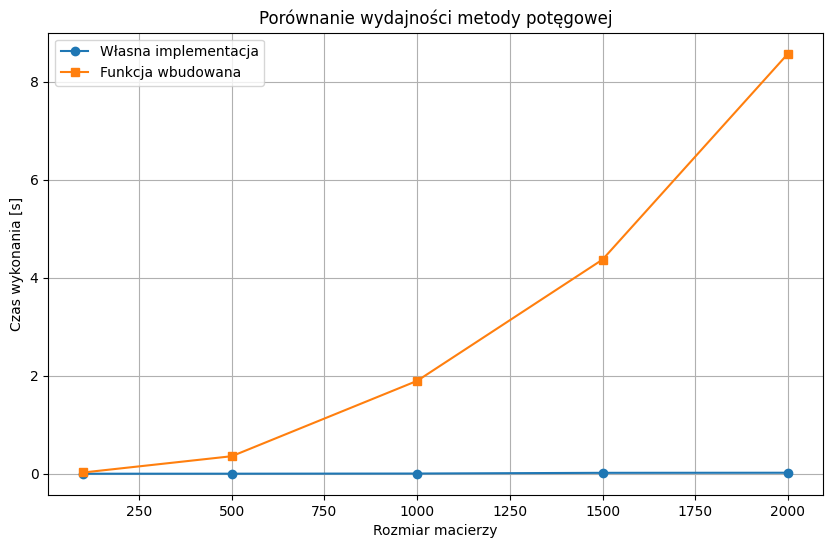

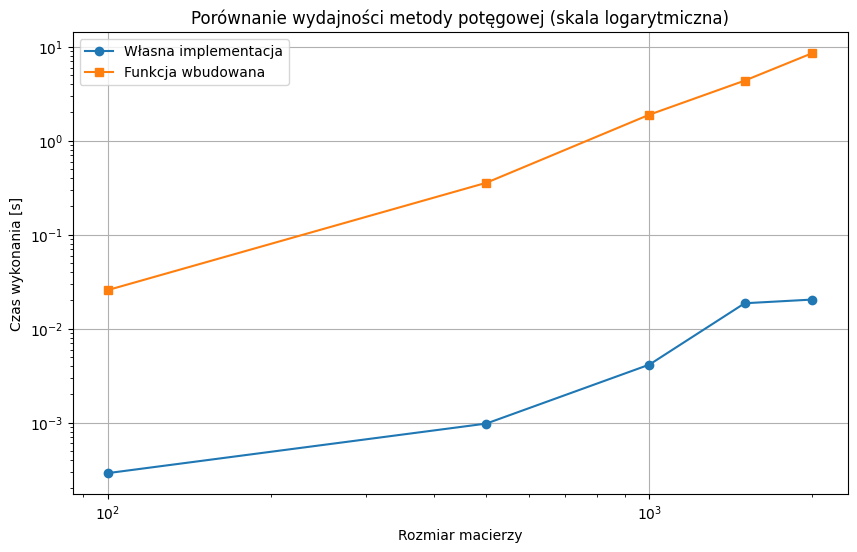

In [19]:
sizes = [100, 500, 1000, 1500, 2000]
custom_times = []
builtin_times = []

for size in sizes:
    A = np.random.rand(size, size)
    A = (A + A.T) / 2  # symetryzacja

    # Metoda własna
    start = time.time()
    eigenvalue, eigenvector = power_method(A.copy())
    end = time.time()
    custom_times.append(end - start)

    # Metoda wbudowana
    start = time.time()
    eigenvalues, eigenvectors = np.linalg.eig(A.copy())
    end = time.time()
    builtin_times.append(end - start)

    print(f"Rozmiar: {size}x{size}, Własna: {custom_times[-1]:.4f}s, Wbudowana: {builtin_times[-1]:.4f}s")
    print(f"Własna wartość własna: {eigenvalue:.4f}, Wbudowana wartość własna: {eigenvalues[0]:.4f}\n")


# Wizualizacja
plt.figure(figsize=(10, 6))
plt.plot(sizes, custom_times, 'o-', label='Własna implementacja')
plt.plot(sizes, builtin_times, 's-', label='Funkcja wbudowana')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Czas wykonania [s]')
plt.title('Porównanie wydajności metody potęgowej')
plt.legend()
plt.grid(True)
plt.show()

# Dodatkowy wykres w skali logarytmicznej
plt.figure(figsize=(10, 6))
plt.loglog(sizes, custom_times, 'o-', label='Własna implementacja')
plt.loglog(sizes, builtin_times, 's-', label='Funkcja wbudowana')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Czas wykonania [s]')
plt.title('Porównanie wydajności metody potęgowej (skala logarytmiczna)')
plt.legend()
plt.grid(True)
plt.show()

Przy szukaniu tylko najwiekszej warosci wlasnej, dla symetrycznej macierzy, implementacja wlasna jest znacznie szybsza niz wbudowana

# Odwrotna metoda potęgowa


In [20]:
from scipy.linalg import lu_factor, lu_solve

In [31]:

def inverse_power_method(A, sigma, max_iter=1000, tol=1e-10):
    n = A.shape[0]
    x = np.ones(n)
    x = x / np.linalg.norm(x, np.inf)

    # Tworzymy A - sigma * I
    B = A - sigma * np.eye(n)
    LU, piv = lu_factor(B)

    for _ in range(max_iter):
        # Rozwiązujemy (A - sigma I) x_{i+1} = x
        x_new = lu_solve((LU, piv), x)
        x_new = x_new / np.linalg.norm(x_new, np.inf)

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new

    # Obliczamy wartość własną
    eigenvalue = np.dot(x, np.dot(A, x)) / np.dot(x, x)
    eigenvector = x / np.linalg.norm(x)

    return eigenvalue, eigenvector


Rozmiar: 100x100
Czas - odwrotna metoda: 0.0020s, wbudowana: 0.0136s
Sigma: 0.4452
Znaleziona wartość (odwrotna): 0.4819
Najbliższa wartość (wbudowana): 0.4819
Dokładność: 0.00000000

Rozmiar: 500x500
Czas - odwrotna metoda: 0.0101s, wbudowana: 0.3544s
Sigma: 0.4285
Znaleziona wartość (odwrotna): 0.4325
Najbliższa wartość (wbudowana): 0.4325
Dokładność: 0.00000000

Rozmiar: 1000x1000
Czas - odwrotna metoda: 0.0347s, wbudowana: 2.0628s
Sigma: 0.4833
Znaleziona wartość (odwrotna): 0.4849
Najbliższa wartość (wbudowana): 0.4849
Dokładność: 0.00000000

Rozmiar: 1500x1500
Czas - odwrotna metoda: 0.1845s, wbudowana: 4.1359s
Sigma: 0.5929
Znaleziona wartość (odwrotna): 0.5956
Najbliższa wartość (wbudowana): 0.5956
Dokładność: 0.00000000

Rozmiar: 2000x2000
Czas - odwrotna metoda: 0.1779s, wbudowana: 11.2487s
Sigma: 0.5065
Znaleziona wartość (odwrotna): 0.5073
Najbliższa wartość (wbudowana): 0.5073
Dokładność: 0.00000000



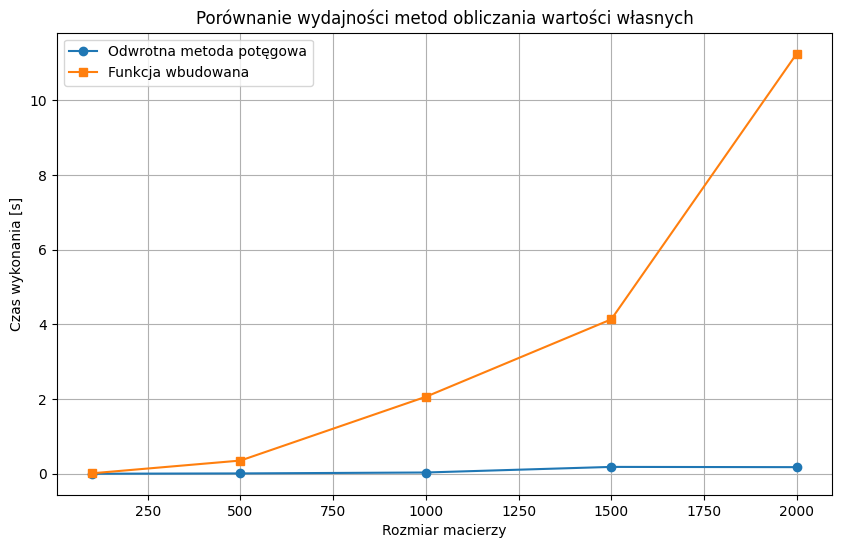

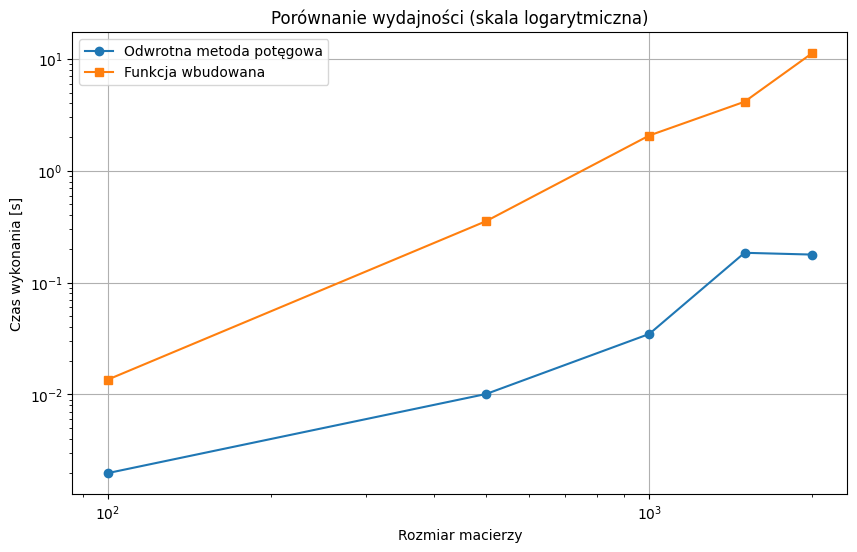

In [32]:
sizes = [100, 500, 1000, 1500, 2000]
inverse_times = []
builtin_times = []
accuracies = []

for size in sizes:
    # Generowanie macierzy symetrycznej
    A = np.random.rand(size, size)
    A = (A + A.T) / 2

    # Wybieramy losowo sigma blisko środka spektrum wartości własnych
    eigenvalues_sample = np.linalg.eigvals(A[:min(size, 10), :min(size, 10)])
    sigma = np.mean(eigenvalues_sample)

    # Odwrotna metoda potęgowa
    start = time.time()
    inv_eigenvalue, inv_eigenvector = inverse_power_method(A.copy(), sigma)
    end = time.time()
    inverse_times.append(end - start)

    # najblizsza sigmie dla etody wbudowanej
    start = time.time()
    all_eigenvalues, all_eigenvectors = np.linalg.eig(A.copy())
    end = time.time()
    builtin_times.append(end - start)

    idx = np.argmin(np.abs(all_eigenvalues - sigma))
    closest_eigenvalue = all_eigenvalues[idx]
    closest_eigenvector = all_eigenvectors[:, idx]


    accuracy = np.abs(inv_eigenvalue - closest_eigenvalue)
    accuracies.append(accuracy)

    print(f"Rozmiar: {size}x{size}")
    print(f"Czas - odwrotna metoda: {inverse_times[-1]:.4f}s, wbudowana: {builtin_times[-1]:.4f}s")
    print(f"Sigma: {sigma:.4f}")
    print(f"Znaleziona wartość (odwrotna): {inv_eigenvalue:.4f}")
    print(f"Najbliższa wartość (wbudowana): {closest_eigenvalue:.4f}")
    print(f"Dokładność: {accuracy:.8f}\n")

# Wizualizacja czasów wykonania
plt.figure(figsize=(10, 6))
plt.plot(sizes, inverse_times, 'o-', label='Odwrotna metoda potęgowa')
plt.plot(sizes, builtin_times, 's-', label='Funkcja wbudowana')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Czas wykonania [s]')
plt.title('Porównanie wydajności metod obliczania wartości własnych')
plt.legend()
plt.grid(True)
plt.show()

# Wykres w skali logarytmicznej
plt.figure(figsize=(10, 6))
plt.loglog(sizes, inverse_times, 'o-', label='Odwrotna metoda potęgowa')
plt.loglog(sizes, builtin_times, 's-', label='Funkcja wbudowana')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Czas wykonania [s]')
plt.title('Porównanie wydajności (skala logarytmiczna)')
plt.legend()
plt.grid(True)
plt.show()


# Iteracje z ilorazem Rayleigha

In [33]:
def rayleigh_quotient_iteration(A, max_iter=1000, tol=1e-10):
    n = A.shape[0]

    x = np.ones(n)
    x = x / np.linalg.norm(x)

    for _ in range(max_iter):
        # Obliczamy bieżący iloraz Rayleigha jako przybliżenie wartości własnej
        sigma = np.dot(x, A @ x) / np.dot(x, x)

        # Tworzymy A - sigma * I
        B = A - sigma * np.eye(n)

        try:
            LU, piv = lu_factor(B)
            x_new = lu_solve((LU, piv), x)
        except np.linalg.LinAlgError:
            raise ValueError("Macierz A - sigma * I jest osobliwa (lub bardzo bliska osobliwości)")

        # Normalizacja
        x_new = x_new / np.linalg.norm(x_new)

        # Sprawdzenie zbieżności
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            x = x_new
            break

        x = x_new

    # Końcowa wartość własna (dokładniejsze wyliczenie)
    eigenvalue = np.dot(x, A @ x) / np.dot(x, x)
    eigenvector = x

    return eigenvalue, eigenvector

Porownania niestety nie zdazylem zrobic

In [38]:
sizes = [100, 500, 1000, 1500]
results = []

for n in sizes:
    np.random.seed(0)
    A = np.random.rand(n, n)
    A = (A + A.T) / 2  # Upewniamy się, że macierz jest symetryczna

    start = time.time()
    eigval, _ = rayleigh_quotient_iteration(A)
    duration = time.time() - start

    print(f"Rozmiar: {n}x{n}, Czas: {duration:.4f}s, Wartość własna: {eigval:.4f}")
    results.append((n, duration, eigval))


Rozmiar: 100x100, Czas: 0.0025s, Wartość własna: 49.7152
Rozmiar: 500x500, Czas: 0.0175s, Wartość własna: 250.2873
Rozmiar: 1000x1000, Czas: 0.0727s, Wartość własna: 500.4702
Rozmiar: 1500x1500, Czas: 0.1719s, Wartość własna: 750.0634


Porownania niestety nie zdazylem